In [1]:
import pandas as pd
import numpy as np
from unidecode import unidecode
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import datetime

In [2]:
col_names = ['issuedate','channel','coupons','revenue']
test = pd.read_csv( "/home/man/Desktop/s7task1.csv",sep=',', header = 0, decimal=',', names=col_names, usecols=col_names)
df1 = pd.DataFrame(data=test)
df1.issuedate = pd.to_datetime(df1.issuedate, format="%m/%d/%y")
df1.coupons = df1.coupons.apply(pd.to_numeric)
df1.revenue = df1.revenue.apply(pd.to_numeric)
df1.head()


,issuedate,channel,coupons,revenue
0,2009-01-13,WWW,5,103082.98
1,2010-01-01,Агенты,5,16518.01
2,2010-01-01,КЦ,1,1137.22
3,2010-01-01,С7 Билет,12,55239.87
4,2010-01-01,ТКП,3,16800.00


In [3]:
df1.dtypes

issuedate    datetime64[ns]
channel              object
coupons               int64
revenue             float64
dtype: object

<AxesSubplot:>

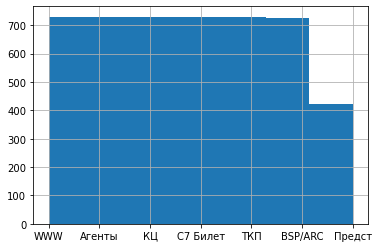

In [4]:
number = LabelEncoder()
df1['channel_old'] = df1.channel
df1.channel = number.fit_transform(df1.channel.astype(str))
# Plot histogram for variable channel_old
df1.channel_old.hist(bins=7)

<AxesSubplot:title={'center':'coupons'}, xlabel='channel_old'>

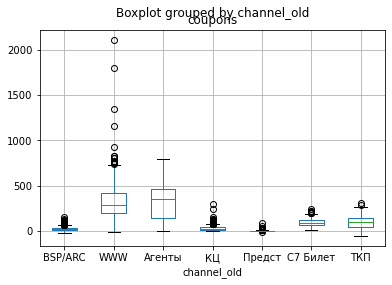

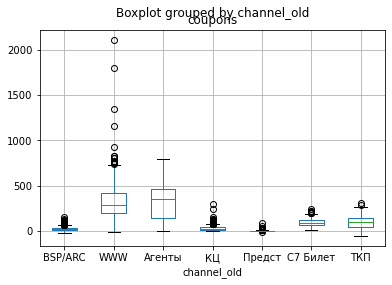

In [5]:
# Plot a box plot for variable coupons by variable channel_old of training data set in between 2010-2011 years
df1.loc[(df1['issuedate'] >= '01/01/2010') & (df1['issuedate'] <= '01/01/2012')].boxplot(column='coupons', by = 'channel_old')
# Plot a box plot for variable coupons by variable channel_old of training data set
df1.boxplot(column='coupons', by = 'channel_old')

In [6]:
#data7 = {     "BSP/ARC" : df1.loc[(df1['issuedate'] >= '01/01/2010') & (df1['issuedate'] <= '01/01/2012') & (df1['channel_old'] == 'BSP/ARC') ]['issuedate'],
#
 #             "WWW":df1.loc[(df1['issuedate'] >= '01/01/2010') & (df1['issuedate'] <= '01/01/2012') & (df1['channel_old'] == 'WWW') ]['issuedate'],
#
 #             "Агенты":df1.loc[(df1['issuedate'] >= '01/01/2010') & (df1['issuedate'] <= '01/01/2012') & (df1['channel_old'] == 'Агенты') ]['issuedate'],
#
  #            "КЦ":df1.loc[(df1['issuedate'] >= '01/01/2010') & (df1['issuedate'] <= '01/01/2012') & (df1['channel_old'] == 'КЦ') ]['issuedate'],
##
     #         "Предст":df1.loc[(df1['issuedate'] >= '01/01/2010') & (df1['issuedate'] <= '01/01/2012') & (df1['channel_old'] == 'Предст') ]['issuedate'],
    #          
   #           "С7 Билет":df1.loc[(df1['issuedate'] >= '01/01/2010') & (df1['issuedate'] <= '01/01/2012') & (df1['channel_old'] == 'С7 Билет') ]['issuedate'],
  #          
 #              "ТКП":df1.loc[(df1['issuedate'] >= '01/01/2010') & (df1['issuedate'] <= '01/01/2012') & (df1['channel_old'] == 'ТКП') ]['issuedate'],
#
 #            };
#dataFrame = pd.DataFrame(data=data7, columns = ["BSP/ARC","WWW","Агенты","КЦ","Предст","С7 Билет","ТКП"], index = pd.date_range(start='01/01/2010', end='01/01/2012', freq='M'))
#dataFrame
#dataFrame.plot(stacked=True);

In [7]:
#dataframe = pd.DataFrame()
#dataframe["BSP/ARC"] = df1.loc[(df1['issuedate'] >= '01/01/2010') & (df1['issuedate'] <= '01/01/2012') & (df1['channel_old'] == 'BSP/ARC') ]['issuedate'].to_numpy()
#dataframe["WWW"] = df1.loc[(df1['issuedate'] >= '01/01/2010') & (df1['issuedate'] <= '01/01/2012') & (df1['channel_old'] == 'WWW') ]['issuedate'].to_numpy()
#dataframe["Агенты"] = df1.loc[(df1['issuedate'] >= '01/01/2010') & (df1['issuedate'] <= '01/01/2012') & (df1['channel_old'] == 'Агенты') ]['issuedate'].to_numpy()
#dataframe["КЦ"] = df1.loc[(df1['issuedate'] >= '01/01/2010') & (df1['issuedate'] <= '01/01/2012') & (df1['channel_old'] == 'КЦ') ]['issuedate'].to_numpy()
#dataframe["Предст"] = df1.loc[(df1['issuedate'] >= '01/01/2010') & (df1['issuedate'] <= '01/01/2012') & (df1['channel_old'] == 'Предст') ]['issuedate'].to_numpy()
#dataframe["С7 Билет"]  =df1.loc[(df1['issuedate'] >= '01/01/2010') & (df1['issuedate'] <= '01/01/2012') & (df1['channel_old'] == 'С7 Билет') ]['issuedate'].to_numpy()
#dataframe["ТКП"] = df1.loc[(df1['issuedate'] >= '01/01/2010') & (df1['issuedate'] <= '01/01/2012') & (df1['channel_old'] == 'ТКП') ]['issuedate'].to_numpy()
#dataframe.set_indexpd.date_range(start='01/01/2010', end='01/01/2012', freq='M')
# здесь мы типо заводим словарь, но этот способ не работает, поскольку мы здесь получаем "серии" (пандасовский термин), а нам там нужны intы

In [8]:
df1

,issuedate,channel,coupons,revenue,channel_old
0,2009-01-13,1,5,103082.980,WWW
1,2010-01-01,2,5,16518.010,Агенты
2,2010-01-01,3,1,1137.220,КЦ
3,2010-01-01,5,12,55239.870,С7 Билет
4,2010-01-01,6,3,16800.000,ТКП
...,...,...,...,...,...
4789,2011-12-31,1,130,237308.530,WWW
4790,2011-12-31,2,66,173957.264,Агенты
4791,2011-12-31,3,16,20968.900,КЦ
4792,2011-12-31,5,56,98799.540,С7 Билет


In [73]:
l = []
for i in df1['issuedate'].to_numpy():
    #l.append(np.datetime64(str(i)[:8] + str(i)[8] + str(i)[9] + str(i)[10:]))
    l.append(np.datetime64(str(i)[:8] + '01' + str(i)[10:]))

In [74]:
df1['m_y'] = l

In [75]:
pt = pd.pivot_table(df1, index='m_y', values='coupons', columns='channel_old', aggfunc='sum').fillna(0)

<AxesSubplot:xlabel='m_y'>

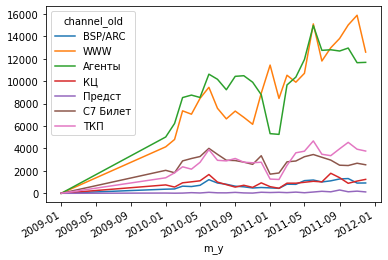

In [76]:
pt.plot()

In [14]:
df1.loc[(df1['issuedate'] >= '01/01/2010') & (df1['issuedate'] <= '01/01/2012') & (df1['channel_old'] == 'С7 Билет') ]['issuedate'].to_numpy().head(5)

AttributeError: 'numpy.ndarray' object has no attribute 'head'